## Imports

In [20]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.fft as fft;

Data imports

In [2]:
AList = np.loadtxt("../Output/2param_acc_Option2/Acceleration.txt");
VList = np.loadtxt("../Output/2param_acc_Option2/LatticeDepth.txt");

AVListIndex = np.loadtxt("../Output/2param_acc_Option2/AVIndex.txt", dtype = int);
MomProb = np.loadtxt("../Output/2param_acc_Option2/MomentumProbability.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList

In [3]:
print(AList[50], VList[25])
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
print(datamom[50,25,:])

0.0 10.0
[1.58886e-03 2.89448e-02 1.29811e-02 1.78990e-01 2.83210e-02 4.13507e-02
 5.59008e-01 5.04661e-02 7.88694e-02 1.94702e-02 9.67359e-06]


## Defining preliminary probabilities
- Define central values for acc and Lattice depth $(a_0,V_0)$ and corresponding _actual probability distirbution_ $P(p|a_0,V_0)$. .
- Import all other pairs of $(a,V)$ and their corresponding probabilitiy distributions $P(p|a,V)$ generated using the learned shaking sequence for $(a_0,V_0)$. 

In [4]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);


a0= 0.0; V0= 0.0;
P_actual=np.array(datamom[50,25,:]);

P_actual=P_actual/np.sum(P_actual);
P_simulated = P_actual; #No errors


Generate samples from the $(a_0,V_0)$ probability distribution

In [5]:
Runs=1000; # How many simulated data do we want
outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated);
unique, frequency = np.unique(outcomes, return_counts = True);

Check that the generated distribution does match actual probabilities $P(p|a_0,V_0)$.

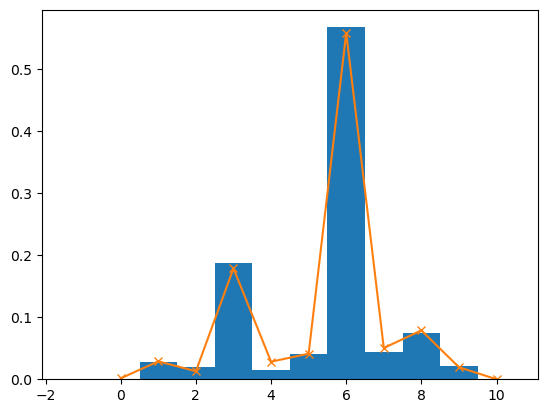

In [6]:
ax=plt.gca();
ax.hist(outcomes,  density = True,stacked = True, bins = np.arange(-1.5,11.5));
ax.plot(PossibleOutcomes, P_actual, 'x-');

## Bayesian Updating

Multiparameter acceleration case

In [176]:
PaVprior = np.full((AList.size, VList.size),1)/(AList.size*VList.size);


#stdTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size*VList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0], indexpair[1]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 10 and counter < 100:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    #mean = np.dot(AList, PaVprior)
    #sq = np.dot (np.power(AList, 2), PaVprior)
    #stdTime.append(np.sqrt( sq- mean**2));

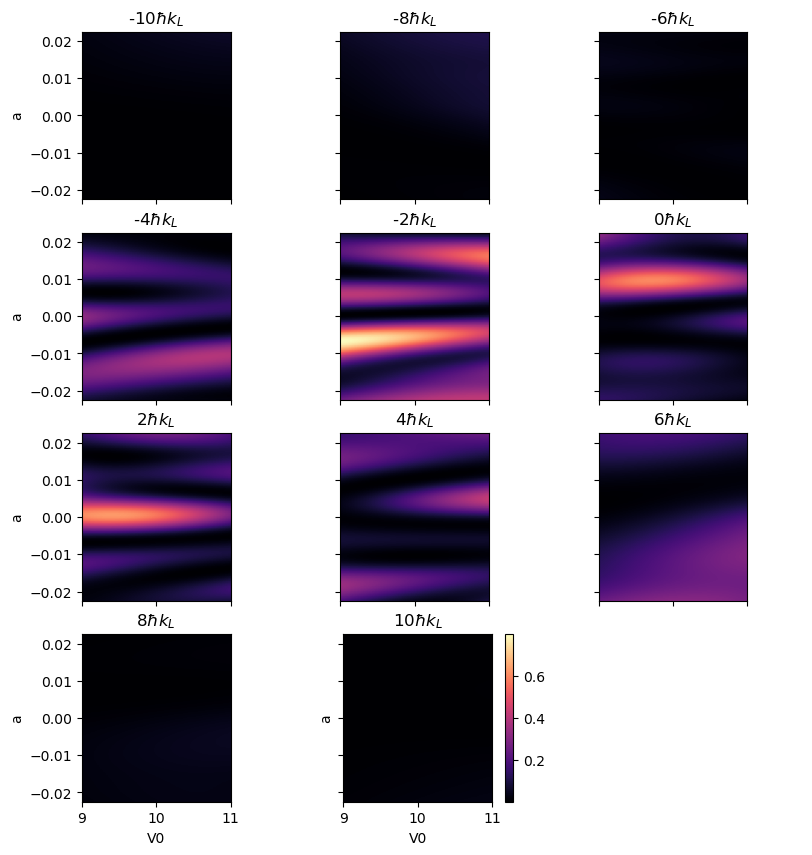

In [7]:
fig=plt.figure(figsize=(10,10))
gs = fig.add_gridspec(4, 3, hspace=0.2, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[-1,-1].axis("off");

minn = np.min(MomProb);
maxx = np.max(MomProb);
for i in range(11):
    ax = axs[i//3, i% 3];
    im=ax.imshow(np.reshape(MomProb[:,i], (AList.size,VList.size)), cmap="magma",extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=50, vmin=minn, vmax = maxx, label=str(2*i-10)+"$\hbar k_L$")


    ax.set_title(str(-10+2*i)+"$\hbar k_L$")
    ax.set_xlabel("V0")
    ax.set_ylabel("a")

fig.colorbar(im,  orientation='vertical')


for ax in fig.get_axes():
    ax.label_outer()

plt.show()

Text(0, 0.5, '$n\\hbar k_L$')

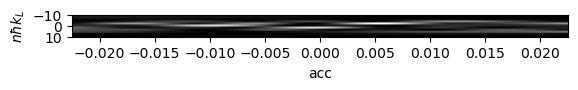

In [8]:
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
plt.imshow(datamom[:,25,:].transpose(), cmap='gray', extent=(AList[0],AList[-1], 10,-10), aspect=1/10000)
plt.xlabel("acc")
plt.ylabel("$n\hbar k_L$")

In [ ]:
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
plt.imshow(datamom[25,:,:].transpose(), cmap='gray', extent=(VList[0],VList[-1], 10,-10), aspect=1/20)
plt.xlabel("V0")
plt.ylabel("$n\hbar k_L$")

In [ ]:
reshaped=np.reshape(AVListIndex, (AList.size, VList.size,2))
reshaped[:,11,:]

In [9]:
fig = plt.figure();
fig.tight_layout()
fig.set_figheight(20)
gs = fig.add_gridspec(len(plotPaV)-10, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
# fig.suptitle('P(a,V|m) with successive m')


# Hide x labels and tick labels for all but bottom plot.
for i in range(len(plotPaV)-10):
    axs[i].imshow(plotPaV[i], cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25);
    axs[i].set_xticks([])
    axs[i].set_yticks([])

for ax in axs:
    ax.label_outer()

plt.xlabel("$V_0$");
plt.ylabel("$a$")
plt.suptitle("$P(a,V_0 |m)$ for every 10 measurements")

NameError: name 'plotPaV' is not defined

<Figure size 640x2000 with 0 Axes>

## Plotting

In [ ]:
plt.loglog(range(1, len(outcomes)+1),stdTime)
plt.xlabel("No. of Measurements");
plt.ylabel("stddev $\sigma_a$")
plt.title("1p $\sigma_a$ with successive Bayesian updating")
plt.savefig("stddev.png")

In [ ]:
plt.plot(AList,PaVprior)
plt.xlabel("acc in code units")
plt.ylabel("P(a,V=10.0|m)")
plt.title("Final P(a,V=10.0|m) after 500 measurements")
plt.show()
plt.savefig("acc.png")

In [ ]:
for i in range(plotPaV.shape[0]):
    plt.plot(AList,plotPaV[i], label=str(i*50));
plt.xlim(-0.002,0.002)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.xlabel("acc in code units")
plt.ylabel("P(a,V=10.0|m)")
plt.title("P(a,V=10.0|m) being updated with measurements")
plt.show()
plt.savefig("zoomedinacc.png")

In [ ]:
plt.loglog(range(100, len(stdTime)+1), stdTime[99:])

In [ ]:
x = np.log(range(100, len(stdTime)+1))
y = np.log(stdTime[ 99:]);

(m,b), (SSE,),*_ =np.polyfit(x, y, deg=1, full=True)

In [ ]:
plt.plot(x,y, label="data")
plt.plot(x,m*x+b, label="fit")
plt.xlabel('log(N_m)')
plt.ylabel("log(\sigma_a)")
plt.legend()
plt.title("Fitting sensitivities to extract CFI")
plt.grid(True)
plt.savefig('Fitsens.png')


In [ ]:
cfibayesian = np.exp(-2*b)
print(cfibayesian)

## Units

In [22]:
#Lambda = 852*10**(-9);
Lambda = 1064*10**(-9);
k_L = 2*np.pi / Lambda;
hbar = 1.054571817*10**(-34);
atomicmass = 86.90918;
massDalton = 1.660539*10**(-27);
mass = atomicmass * massDalton;
E_R = (hbar * k_L)**2 /(2*mass);

In [23]:
accUnit= 2*(E_R)**2/(hbar**2*k_L)

In [24]:
codeacc = 0.025;
realacc = codeacc*accUnit
g=9.81;

In [ ]:
realacc/10

In [ ]:
realacc = 0.125*9.81;
codeacc = realacc/accUnit
print(codeacc)

## Jenson-Shannon Divergence

In [10]:
def KLDivergence( P, Q):
    if len(P) != len(Q):
        return None;
    sum =0;

    for i in range(len(P)):
        sum = np.dot(P, np.log2( np.divide(P, Q)));

    return sum;


Let's do a sanity check

In [ ]:
plt.figure(figsize= (20,5))

plt.plot([KLDivergence(MomProb[500],MomProb[i]) for i in range(MomProb.shape[0] ) ] )

The above data makes sense: the overall minimum is when I calculate the KL divergence with itself. However, there are oscillations, since the large array MomProb oscillates between different $V_0$ for same value of $a$. 

In [11]:
def JSDivergence( P, Q):
    M = (P+Q)/2;
    JS = 0.5 * ( KLDivergence(P,M) + KLDivergence(Q, M));
    return JS;


In [ ]:
plt.figure(figsize= (20,5))

plt.plot([JSDivergence(MomProb[500],MomProb[i]) for i in range(MomProb.shape[0] ) ] )

In [ ]:
print(MomProb.shape)
print(AList.shape)
print(VList.shape)
print(AList.shape[0]*VList.shape[0])

Implementung pseudocode:
- Pick a value for $V_0$ and all entries of index pairs for this value of $V_0$

In [ ]:
 np.where(AVListIndex==11)

In [ ]:
AVListIndex[np.where(AVListIndex[:,1]==11)[0]]

In [ ]:
momindices=np.where(AVListIndex[:,1]==15)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

In [ ]:
no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

In [ ]:
plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0], acc[-1], acc[-1], acc[0] ])
plt.colorbar()

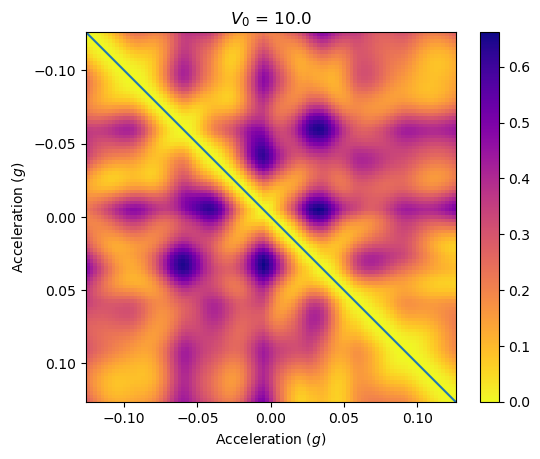

In [60]:
momindices=np.where(AVListIndex[:,1]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]*accUnit/g,AList[indices_JS[0]]*accUnit/g)
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title("$V_0$ = "+str(VList[25]))
plt.savefig("JS_acc.png")

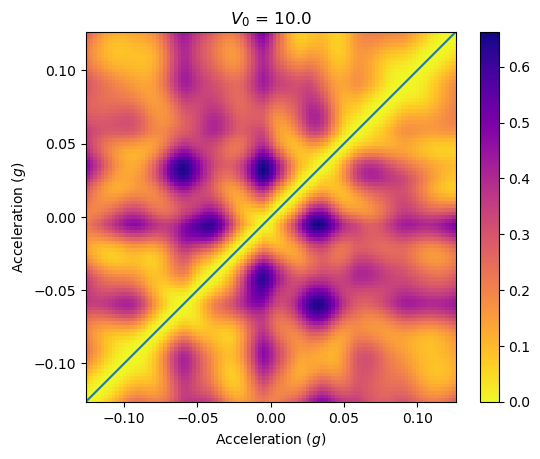

In [63]:
momindices=np.where(AVListIndex[:,1]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]*accUnit/g, AList[indices_JS[0]]*accUnit/g)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title("$V_0$ = "+str(VList[25]))
plt.savefig("JS_acc.png")

In [64]:
JSDivergenceMatrix.shape

(101, 101)

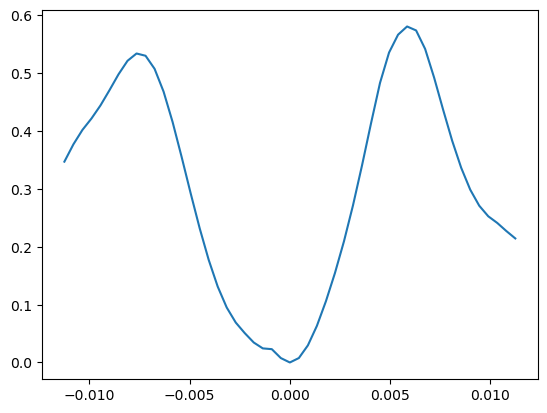

In [66]:
plt.plot(AList[25:76], JSDivergenceMatrix[50,25:76])

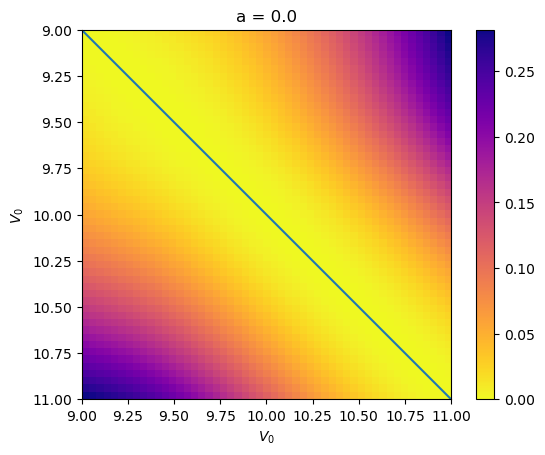

In [240]:
momindices=np.where(AVListIndex[:,0]==50)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

lattindices = indices[:, 1];
latt = VList[lattindices]

no_of_values = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in lattindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], latt[-1], latt[0] ])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(VList[indices_JS[1]], VList[indices_JS[0]])
plt.colorbar()
plt.xlabel("$V_0$");
plt.ylabel("$V_0$");
plt.title("a = "+ str(AList[50]))
plt.savefig("JS_latt.png")

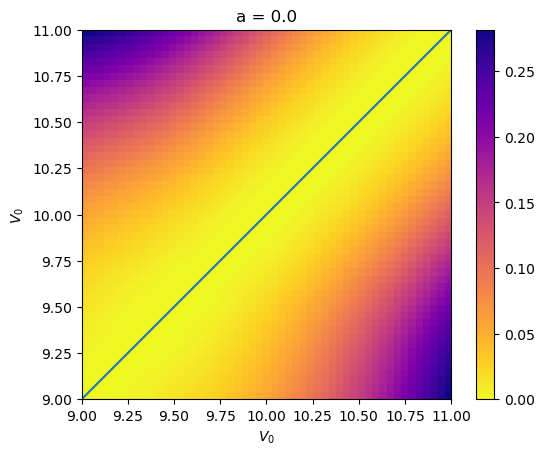

In [54]:
momindices=np.where(AVListIndex[:,0]==50)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

lattindices = indices[:, 1];
latt = VList[lattindices]

no_of_values = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in lattindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], latt[-1], latt[0] ])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(VList[indices_JS[1]], VList[indices_JS[0]])
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel("$V_0$");
plt.ylabel("$V_0$");
plt.title("a = "+ str(AList[50]))
plt.savefig("JS_latt.png")

Cross-correlation

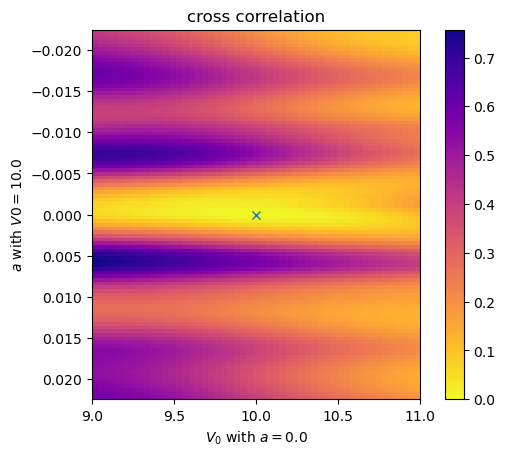

In [241]:
momindices_a=np.where(AVListIndex[:,1]==25)[0];
momproblist_a =MomProb[momindices_a];
indices_a = AVListIndex[momindices_a];

momindices_V=np.where(AVListIndex[:,0]==50)[0];
momproblist_V =MomProb[momindices_V];
indices_V = AVListIndex[momindices_V];

accindices = indices_a[:, 0];
acc = AList[accindices];

lattindices = indices_V[:, 1];
latt = VList[lattindices]

no_of_values_a = len(accindices);
no_of_values_V = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values_a, no_of_values_V)) ;

for i in accindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist_a[i], momproblist_V[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], acc[-1], acc[0] ], aspect=50)
indices_JS = np.where(JSDivergenceMatrix==0.0)
plt.plot(VList[indices_JS[1]],AList[indices_JS[0]], 'x')
#plt.plot(AList[indices_JS[0]],VList[indices_JS[1]])
plt.xlabel("$V_0$ with $a=$"+str(AList[50]))
plt.ylabel("$a$ with $V0=$"+str(VList[25]))
plt.colorbar()
plt.title("cross correlation")
plt.savefig("JS_cross.png")


In [235]:
min

0.0

## Exploring Dynamic Range

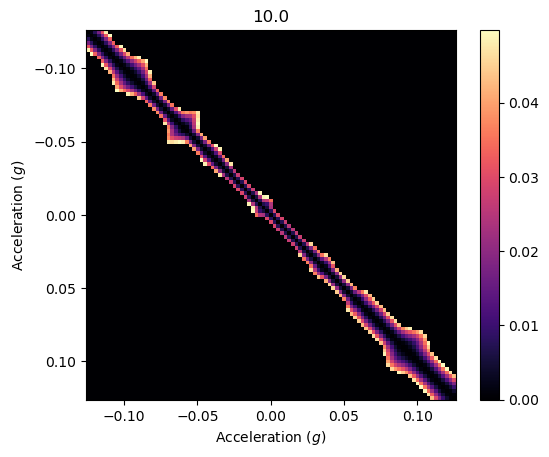

In [242]:
momindices=np.where(AVListIndex[:,1]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

JSDivergenceMatrix[JSDivergenceMatrix>0.05]=0;
plt.imshow(JSDivergenceMatrix, cmap="magma", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title(VList[25])
plt.savefig("JS_acc_range.png")


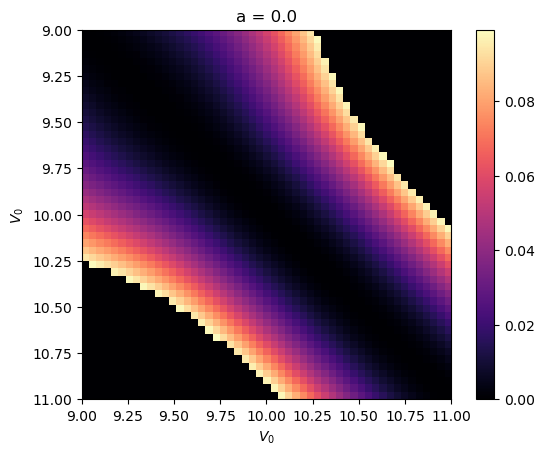

In [243]:
momindices=np.where(AVListIndex[:,0]==50)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

lattindices = indices[:, 1];
latt = VList[lattindices]

no_of_values = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in lattindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

JSDivergenceMatrix[JSDivergenceMatrix>0.1]=0;
plt.imshow(JSDivergenceMatrix, cmap="magma", extent=[latt[0], latt[-1], latt[-1], latt[0] ])
plt.colorbar()
plt.xlabel("$V_0$");
plt.ylabel("$V_0$");

plt.title("a = "+ str(AList[50]));
plt.savefig("JS_latt_range.png")

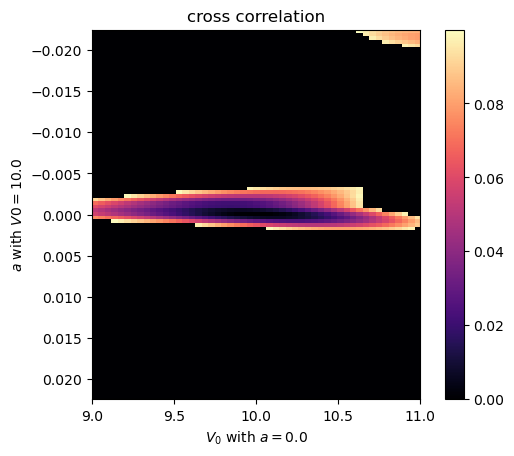

In [244]:
momindices_a=np.where(AVListIndex[:,1]==25)[0];
momproblist_a =MomProb[momindices_a];
indices_a = AVListIndex[momindices_a];

momindices_V=np.where(AVListIndex[:,0]==50)[0];
momproblist_V =MomProb[momindices_V];
indices_V = AVListIndex[momindices_V];

accindices = indices_a[:, 0];
acc = AList[accindices];

lattindices = indices_V[:, 1];
latt = VList[lattindices]

no_of_values_a = len(accindices);
no_of_values_V = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values_a, no_of_values_V)) ;

for i in accindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist_a[i], momproblist_V[j])

JSDivergenceMatrix[JSDivergenceMatrix>0.1]=0;
plt.imshow(JSDivergenceMatrix, cmap="magma", extent=[latt[0], latt[-1], acc[-1], acc[0] ], aspect=50)
plt.xlabel("$V_0$ with $a=$"+str(AList[50]))
plt.ylabel("$a$ with $V0=$"+str(VList[25]))
plt.colorbar()
plt.title("cross correlation")
plt.savefig("JS_cross_range.png")


## Automating Sensitivity Plots

### Bayesian Code

In [ ]:


#stdTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size*VList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0], indexpair[1]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 50 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    #mean = np.dot(AList, PaVprior)
    #sq = np.dot (np.power(AList, 2), PaVprior)
    #stdTime.append(np.sqrt( sq- mean**2));

### Bayesian Contour

Text(0.5, 0.98, '$P(a,V_0 |m)$ for every 50 measurements')

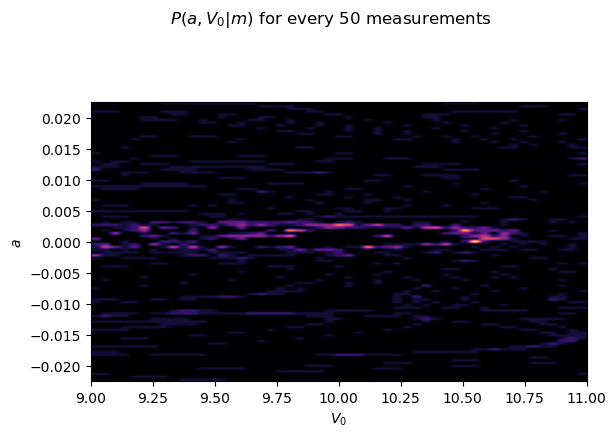

In [171]:
fig = plt.figure();

sumplotPaV=np.zeros(plotPaV[0].shape);
# fig.suptitle('P(a,V|m) with successive m')


# Hide x labels and tick labels for all but bottom plot.
for i in range(len(plotPaV)):
    temp = np.copy(plotPaV[i]);
    temp[abs(temp-0.00001)<=0.000001]=1;
    temp[temp!=1]=0;
    sumplotPaV+=temp;
   # axs[i].imshow(plotPaV[i], cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25);

plt.imshow(sumplotPaV, cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25)
plt.xlabel("$V_0$");
plt.ylabel("$a$")
plt.suptitle("$P(a,V_0 |m)$ for every 50 measurements")

In [164]:
sumplotPaV.shape

(101, 51)

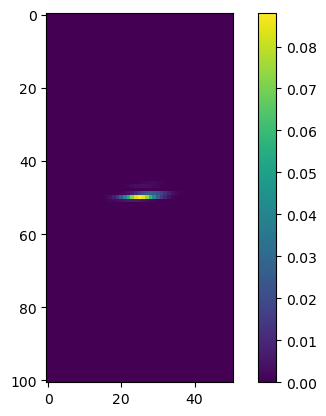

In [125]:
plt.imshow(plotPaV[-1]);
plt.colorbar()

Text(0.5, 1.0, '10.0')

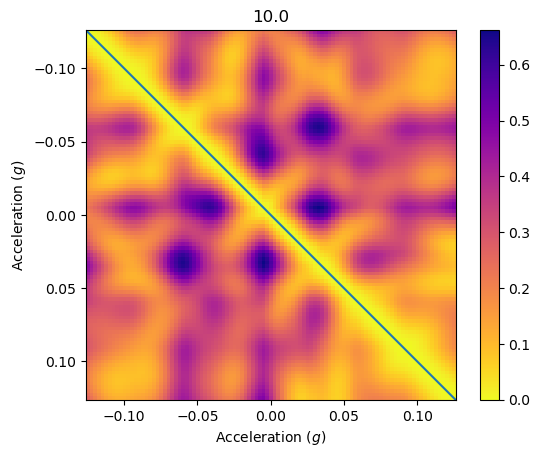

In [203]:
momindices=np.where(AVListIndex[:,1]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[0]]*accUnit/g,AList[indices_JS[1]]*accUnit/g)
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title(VList[25])


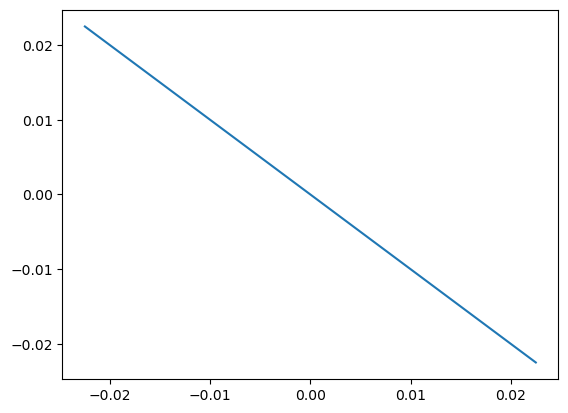

In [198]:
plt.plot(AList[indices_JS[0]],-AList[indices_JS[1]])

In [208]:
x = np.array ( [[1,2,-6, 1],[3,4,0,1]]);
np.where(x==0)

(array([1]), array([2]))